# Extensions of Linear Regression

### Introduction

Linear regression is a powerful tool for modeling relationships between independent variables (features) and a dependent variable (target). However, in many real-world contexts, the assumption of linearity can be too restrictive. This notebook explores two extensions that allow us to overcome this limitation: polynomial regression and weighted linear regression.

Polynomial regression allows modeling non-linear relationships between features and the target. This model —in its simplest version— is based on using polynomials of a numerical variable from the dataset to train a simple linear regression model, which calculates the set of coefficients that best fit this new transformed dataset.

Under the same premise as polynomial regression, we present the weighted linear regression model. This uses a technique that assigns each data point a coefficient w, called weight, so that for each data point to be predicted, greater importance is given to closer data points, with this importance decreasing as the distance increases.

In this way, a new set of parameters relating the independent variables and the dependent variable is calculated for each data point. This characteristic, within Machine Learning models, is categorized as non-parametric, which differentiates weighted linear regression from simple linear regression, since the latter calculates a single set of parameters that attempts to model the relationship between features and target in a linear and global way for the entire dataset.

### Motivation

Explore and analyze extensions of linear regression that help better understand the adaptability of this model when tested with data that, in principle, exceeds its capabilities.

### Objective

Present in a practical and easily reproducible way the polynomial regression and weighted linear regression models, aiming to follow best practices and respect syntax and structure conventions.

### Data

This notebook uses a synthetic dataset with the main objective of contributing to the exploration and analysis of the presented models, as well as maintaining the reproducibility of the repository in a simple way.

## Code

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import custom classes and functions from src folder
import sys
sys.path.append('../src')
from linear_regression import LinReg
from lwlr import LW_LinReg

,X,y
0,0.046320,0.204618
1,0.050616,-0.541176
2,0.055221,0.328096
3,0.069521,0.478984
4,0.091971,0.509562


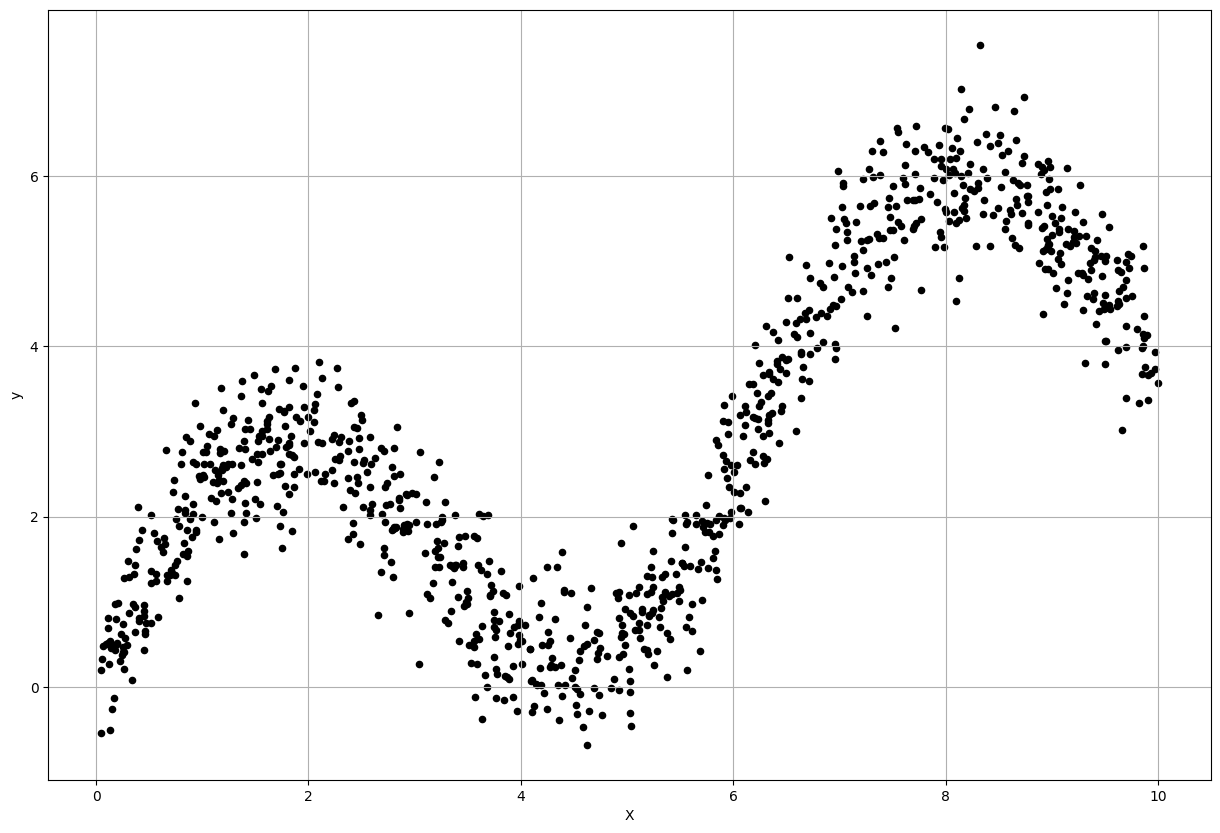

In [4]:
# Load and visualize the dataset
data = pd.read_csv('../data/dataset_regresion.csv')
data.plot(x='X', y='y', kind='scatter', color='black', figsize=(15, 10), grid=True)
data.head()

## Polynomial Regression

In [5]:
# Apply polynomial transformation up to degree 15
data_poly = data.copy()
grados = 15
for i in range(1, grados):
    data_poly[f'X^{i+1}'] = data_poly['X'] ** i+1

# Separate features and target
X = data_poly.drop(columns=['y']).copy()
y = data_poly['y'].copy()

# Split into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Create a function to compute regressions with different polynomial degrees,
# plot their predictions and print the Mean Squared Error of each
def plot_poly_reg(Data, save=False, savepath='output/poly_reg_predict_vs_actual{}.jpg'):
    palette = {2: "#4B0528", 3:'#A5FFD6', 4:'#0D5C63', 5:'#E8D33F', 6:'#EE6352', 7:'#9AE19D',
               8:'#553555', 9:'#137547', 10:"#BE7C4D", 11:'#4B0528', 12:'#042A2B'}
    scores = {}

    X_train, X_test, y_train, y_test = Data
    plt.figure(figsize=(15, 10))
    plt.scatter(X_test['X'], y_test, color='black', alpha=0.8, label='Actual')
    for i in range(2, 7):
        model = LinReg()
        model.fit(X_train.iloc[:, :i], y_train)
        scores[f'{i}'] = model.score(X_test.iloc[:, :i], y_test)
        plt.scatter(X_test['X'], model.predict(X_test.iloc[:, :i]), color=palette[i], alpha=0.8, label=f'Poly Degree {i}')
    plt.title('Predict vs Actual by Polynomial Degree')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    if save: plt.savefig(savepath.format('_degree_6'))
    plt.show()

    plt.figure(figsize=(15, 10))
    plt.scatter(X_test['X'], y_test, color='black', alpha=0.8, label='Actual')
    for i in range(6, 13):
        model = LinReg()
        model.fit(X_train.iloc[:, :i], y_train)
        scores[f'{i}'] = model.score(X_test.iloc[:, :i], y_test)
        plt.scatter(X_test['X'], model.predict(X_test.iloc[:, :i]), color=palette[i], alpha=0.6, label=f'Poly Degree {i}')
    plt.title('Predict vs Actual by Polynomial Degree')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    if save: plt.savefig(savepath.format('_degree_12'))
    plt.show()

    for i in range(13, 16):
        model = LinReg()
        model.fit(X_train.iloc[:, :i], y_train)
        scores[f'{i}'] = model.score(X_test.iloc[:, :i], y_test)

    print('| Mean Squared Error |')
    for i, score in scores.items():
        print(' -------------------------')
        print(f'|Poly Degree {i:<4} ->  {score:.4f}|')

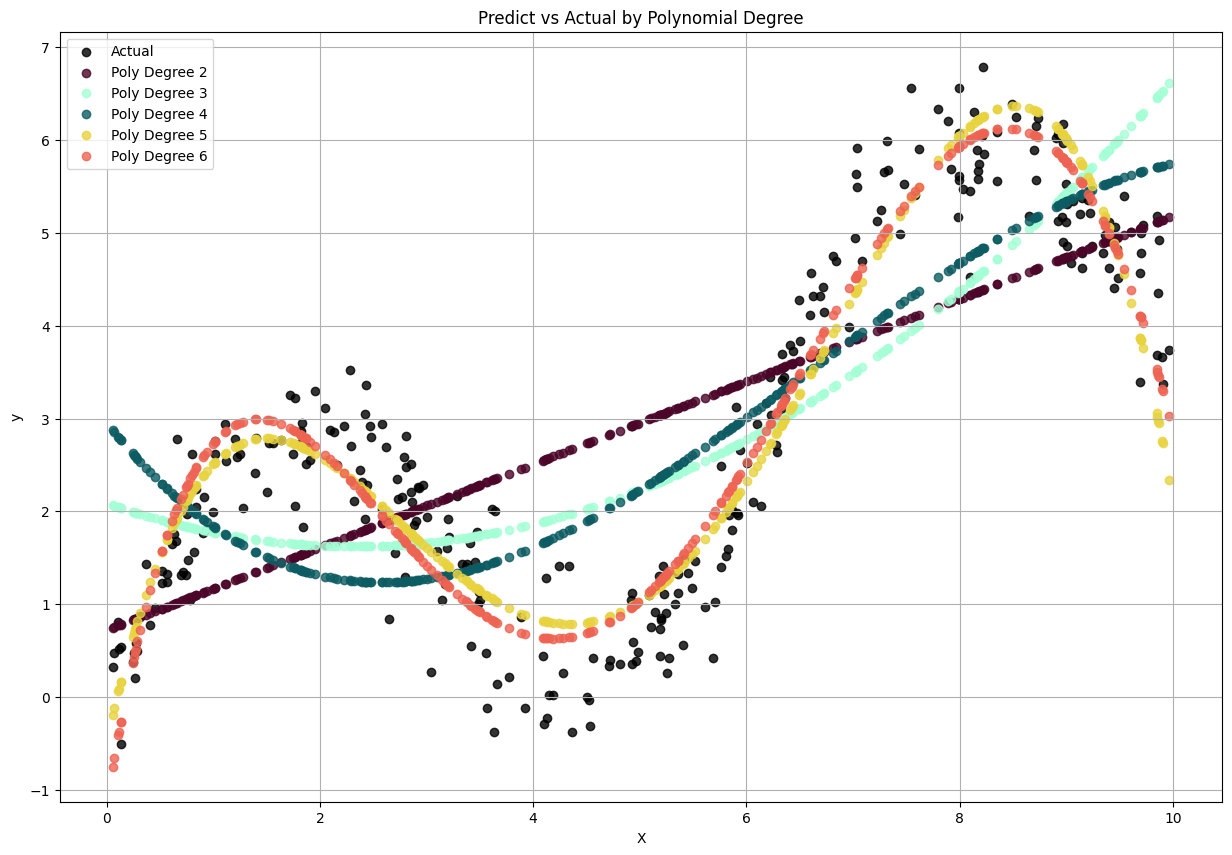

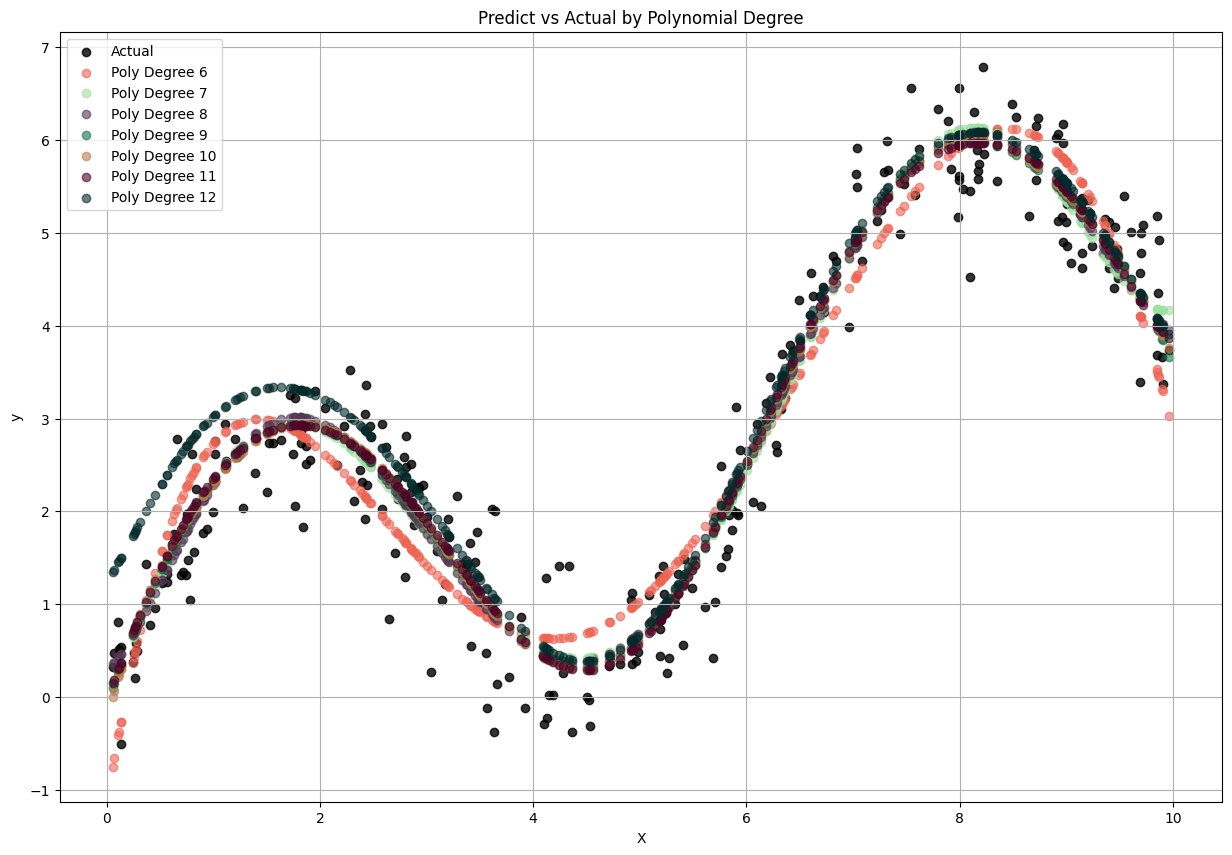

| Mean Squared Error |
 -------------------------
|Poly Degree 2    ->  1.8207|
 -------------------------
|Poly Degree 3    ->  1.5108|
 -------------------------
|Poly Degree 4    ->  1.4740|
 -------------------------
|Poly Degree 5    ->  0.4001|
 -------------------------
|Poly Degree 6    ->  0.3605|
 -------------------------
|Poly Degree 7    ->  0.2367|
 -------------------------
|Poly Degree 8    ->  0.2341|
 -------------------------
|Poly Degree 9    ->  0.2273|
 -------------------------
|Poly Degree 10   ->  0.2295|
 -------------------------
|Poly Degree 11   ->  0.2298|
 -------------------------
|Poly Degree 12   ->  0.4090|
 -------------------------
|Poly Degree 13   ->  18140.5585|
 -------------------------
|Poly Degree 14   ->  5995.6084|
 -------------------------
|Poly Degree 15   ->  110.8469|


In [7]:
# Run the function
plot_poly_reg((X_train, X_test, y_train, y_test), save=True)

### Analysis

As can be seen, in the first attempts to model the behavior of variable 'y' with respect to 'X', the predictions are substantially far from being considered accurate. Side note: the degree 2 polynomial shows behavior almost identical to simple linear regression.

It is only from degree 5 onwards that the predictions start to resemble the real data, with degree 12 being the first to diverge notably again. Thus, polynomials of degrees between 6 and 11 seem to yield very similar results, with small differences.

More explicitly, the table showing the MSE of each regression clearly indicates that, as the polynomial degree increases, the prediction accuracy improves. This behavior continues up to degree 9, where the metric reaches its best value. From there, it starts to increase again, shooting up dramatically at degree 13, and then improving relatively towards degree 15. The latter were not plotted because their values were so large that plotting them would render other data points nearly invisible.

### Conclusions

The model's behavior throughout the experiment allows us to conclude that increasing the polynomial degree with which it is trained and tested provides greater flexibility. This could be because it allows modeling more complex behaviors and curves, as each transformed dataset is in a space with more dimensions than the previous one.

However, this improvement has a limit. As observed, this limit seems to be at degree 9.

From that point on, the model begins to show clear overfitting. That is, it fits the training data so exhaustively that it loses the ability to generalize patterns and predict values from data outside the training set.

This phenomenon may be due to the number of parameters the model must calculate. As the number of independent variables increases excessively, sensitivity to noise increases, which in turn raises the variance of predictions and explains the increase in mean squared error.

A possible cause of the anomalous MSE behavior at degree 13 could be related to computational issues. Although theoretically it could be attributed to an extreme case of overfit, in that scenario a very low MSE would be expected on the training set, which does not occur. In fact, when evaluating the model on the training set at those degrees, the MSE is only slightly lower than on test, but still extremely high. This suggests that other factors may be involved, such as numerical instability or precision issues in the calculation.

## Weighted Linear Regression

In [8]:
# Separate features and target
X = data[['X']].copy()
y = data['y'].copy()

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Create a function that computes weighted linear regression predictions for each
# tau value, plots them, and prints the Mean Squared Error of each
def plot_lw_linreg(Data, taus, save=False, savepath='output/lw_linreg_tau_comparison.jpg'):
    palette = ["#6FB495", '#EE6352', '#0D5C63', '#4B0528', '#E8D33F', '#9AE19D',
               '#553555', "#BE7C4D", '#137547', "#4B0528", '#042A2B']
    scores = {}
    
    X_train, X_test, y_train, y_test = Data
    plt.figure(figsize=(15, 10))
    plt.scatter(X_test, y_test, color='black', alpha=0.8, label='Actual')
    for tau in taus:
        y_pred = LW_LinReg(X_train, y_train, X_test, tau=tau)
        plt.scatter(X_test, y_pred, color=palette[taus.index(tau)], alpha=0.8, label=f'tau={tau}')
        scores[f'{tau}'] = mean_squared_error(y_test, y_pred)
    plt.title('Predictions vs Actual. Tau Comparison')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    if save: plt.savefig(savepath)
    plt.show()

    print('| Mean Squared Erorr |')
    for tau, score in scores.items():
        print(' -------------------------')
        print(f'|tau = {tau:<5} ->  {score:.4f}|')    

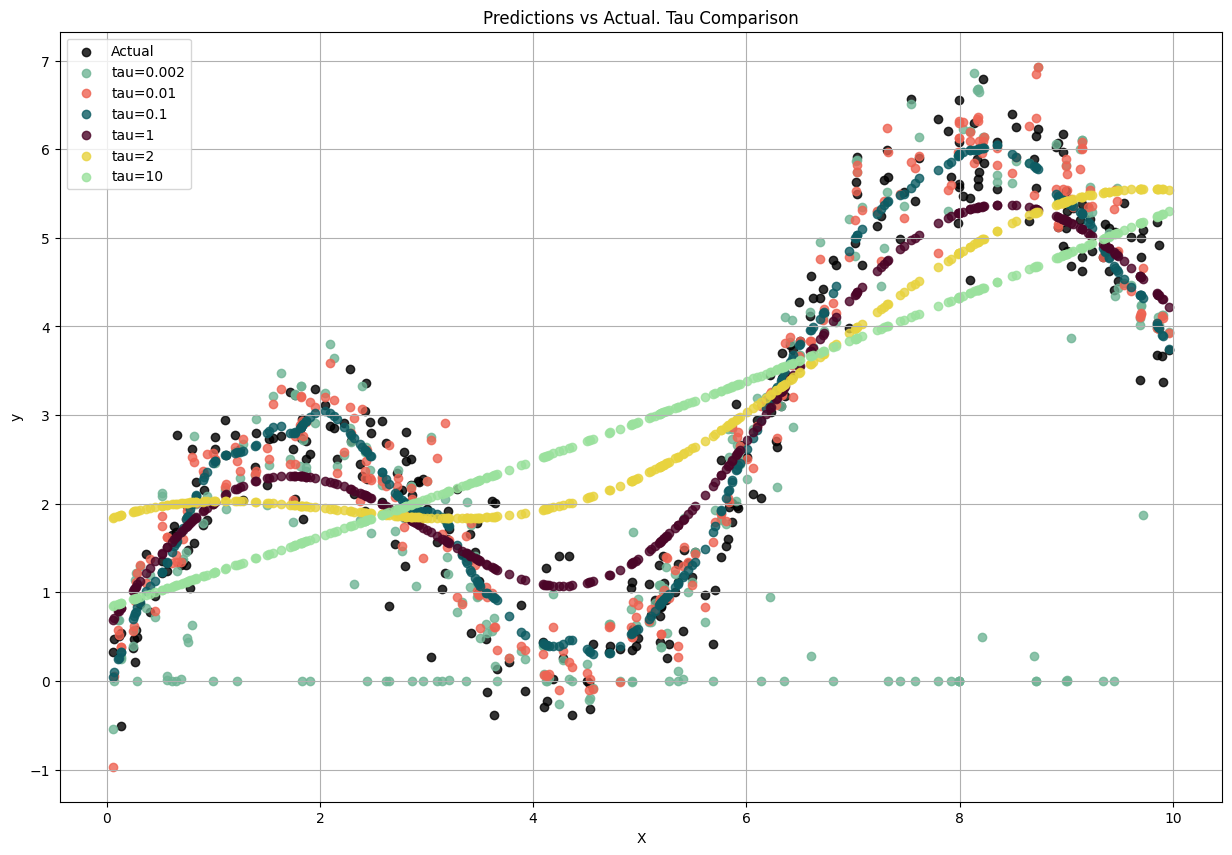

| Mean Squared Erorr |
 -------------------------
|tau = 0.002 ->  2.7112|
 -------------------------
|tau = 0.01  ->  0.3596|
 -------------------------
|tau = 0.1   ->  0.2298|
 -------------------------
|tau = 1     ->  0.4405|
 -------------------------
|tau = 2     ->  1.1469|
 -------------------------
|tau = 10    ->  1.7776|


In [10]:
# Run the function
taus = [0.002, 0.01, 0.1, 1, 2, 10]
plot_lw_linreg((X_train, X_test, y_train, y_test), taus, save=True)

### Analysis

If we start with the prediction for tau = 10, it can be seen that the experiment begins —just like the previous one— with behavior very similar to simple linear regression. As tau decreases, the predictions start to draw increasingly smoother curves, which helps reduce the mean squared error.

However, this behavior reverses after crossing tau = 0.1, where the regression achieves its best predictions. From that point, the error starts to increase, indicating a drop in accuracy. Although the plot shows greater dispersion of the points —which might suggest better imitation of the variables' behavior—, actually, they move further away from the real data, as evidenced by the mean squared error values.

Finally, multiple points of the prediction with tau = 0.002 are located on the line y = 0, clearly indicating errors in the regression for that tau value.

### Conclusions

After analyzing the model results, several conclusions can be drawn:

- Large tau values are associated with more linear predictions,indicating clear underfit, simulating behavior similar to simple linear regression.

- Conversely, very small tau values cause the predictions to imitate the training data with great precision but lose the ability to generalize and recognize patterns in unseen data, which shows overfit in the regression.

- When tau is within an optimal range, the regression manages to capture the behavioral patterns of the variables and generalize them properly. In these cases, smooth curves are drawn that pass as close as possible to the test data, balancing accuracy and generalization ability.

This behavior is explained because, in weighted regressions, tau acts as a parameter that regulates how dispersed the weight coefficients will be depending on the distance to the data point to be predicted. Thus, large tau values give similar importance to all data, generating almost constant parameters throughout the dataset,resulting in predictions shaped like a straight line.

On the other hand, very small tau values mean that even a minimal distance causes a weight coefficient w = 0, nullifying almost all training data except the closest ones. This explains the overfit, and, in extreme cases, that the minimum distance is so strict that there is no data point close enough, causing a null or zero prediction (due to how the LW_LinReg() function initializes its parameters).